# 🧩 3.2 – Parámetros Variables y Ámbito Anidado (LEGB avanzado)

En este notebook profundizamos en el manejo de **argumentos variables** (`*args`, `**kwargs`) y el sistema de búsqueda de nombres en Python (**LEGB**). Entender estos conceptos es clave para escribir funciones reutilizables y evitar errores sutiles de ámbito.

---
## 🎯 Objetivos
- Dominar `*args` y `**kwargs` para diseñar funciones flexibles.
- Comprender cómo Python busca las variables según el modelo **LEGB**.
- Aplicar funciones anidadas con distintos niveles de ámbito.
- Crear funciones genéricas con control de parámetros dinámicos.

In [1]:
print('✅ Notebook 3.2 — Parámetros Variables y LEGB avanzado listo para usar.')

✅ Notebook 3.2 — Parámetros Variables y LEGB avanzado listo para usar.


---
## 1️⃣ Recordatorio rápido: *args y **kwargs

- `*args` agrupa todos los argumentos posicionales en una **tupla**.
- `**kwargs` agrupa los argumentos con nombre en un **diccionario**.

Permiten crear funciones que admitan **número variable de argumentos**.

In [2]:
def mostrar_args(arg1, arg2, *args, edad, nombre, **kwargs):
    print('Posicionales Fijo', arg1, arg2)
    print('Posicionales Dinamico:', args)
    print('ClaveValorFijo', edad, nombre)
    print('Nombrados:', kwargs)

mostrar_args(1, 2, 3, 4, 5, sueldo=333, nombre='Ana', edad=30, profesion='granjero')

Posicionales Fijo 1 2
Posicionales Dinamico: (3, 4, 5)
ClaveValorFijo 30 Ana
Nombrados: {'sueldo': 333, 'profesion': 'granjero'}


El orden de los parámetros es importante en las funciones:
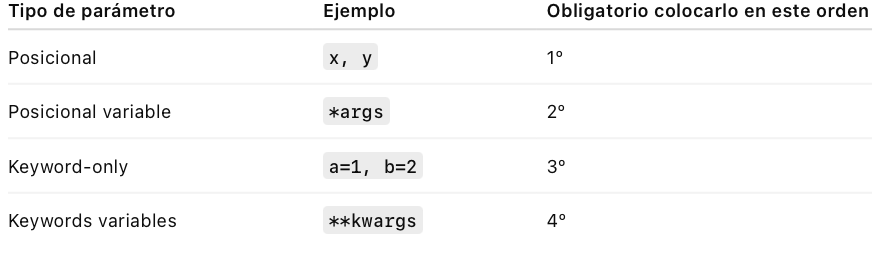

Aunque no se ponga, todos los argumentos después de *args y antes de **kwargs son keyword-only, que significa que ese parámetro solo puede pasarse usando su nombre, nunca como argumento posicional.
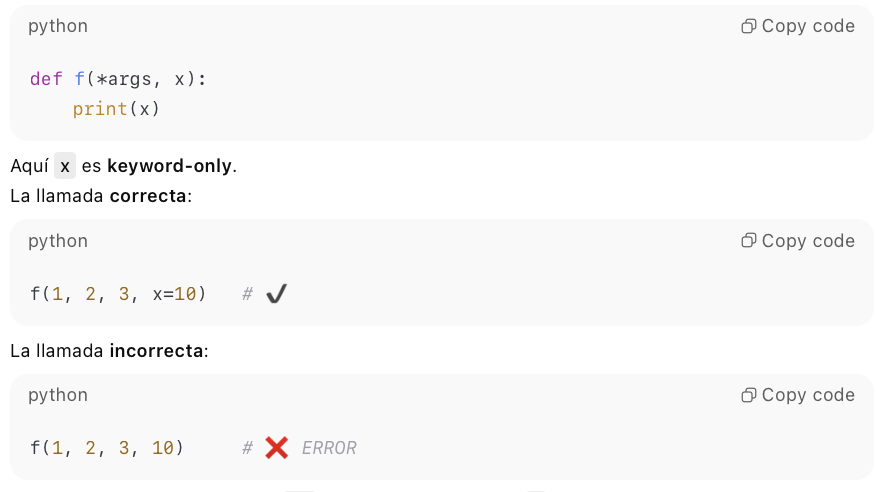

✅ Ideal para escribir funciones que puedan recibir muchos parámetros opcionales.

---
## 2️⃣ Ejercicio 1 — Crear una función flexible de impresión

Crea una función `imprimir_formato(*args, **kwargs)` que:
- Imprima los valores posicionales separados por un delimitador definido en `kwargs` (`sep`, por defecto una coma).
- Si `upper=True` está en los kwargs, los imprima en mayúsculas.

💡 *Pista:* usa `'sep' in kwargs` y `kwargs.get('upper', False)`.

In [3]:
def imprimir_formato(*args, **kwargs):
    sep = kwargs.get('sep', ',') # mira el valor de la clave 'sep' y, si no existe, devuelve 'None', no error.
    upper = kwargs.get('upper', False) # hace lo mismo con sep, pero con upper

    valores = []

    for a in args:
        if upper:
            valores.append(str(a).upper())
        else:
            valores.append(str(a))
    print(sep.join(valores))

imprimir_formato('hola', 'mundo', 3, saludo= 'hola')



hola,mundo,3


**NOTA**: python sabe si los argumentos son args o kwargs por cómo se llaman.
- Si se pasa el argumento sin nombre -> args.
- Si se pasa el argumento con nombre -> kwargs.

Se ve fácil aquí:

In [4]:
def demo(*args, **kwargs):
    print("args", args )
    print("kwargs", kwargs)

In [5]:
demo(1,2,3, nombre= 'yoni', edad= 20)

args (1, 2, 3)
kwargs {'nombre': 'yoni', 'edad': 20}


In [6]:
# Escribe tu solución aquí...
def imprimir_formato(*args, **kwargs):
    sep = kwargs.get('sep',', ')
    upper = kwargs.get('upper', False)

    valores = [str(a).upper() if upper else str(a) for a in args]
    print(sep.join(valores))
    

imprimir_formato('hola','mundo',3,upper=True, sep='#')

HOLA#MUNDO#3


### ✅ Solución propuesta

In [7]:
def imprimir_formato(*args, **kwargs):
    sep = kwargs.get('sep', ', ')
    upper = kwargs.get('upper', False)

    valores = [str(a).upper() if upper else str(a) for a in args]
    print(sep.join(valores))

imprimir_formato('manzana', 'pera', 'kiwi')
imprimir_formato('manzana', 'pera', 'kiwi', sep=' | ', upper=True)

manzana, pera, kiwi
MANZANA | PERA | KIWI


Aunque args y kwargs acepten los parámetros que nosotros queramos, tenemos que definir dentro de la función lo que van a hacer esos parámetros. Si no, no hacen nada.

✅ Combinar `*args` y `**kwargs` permite definir funciones de propósito general sin necesidad de redefinir sus parámetros.

---
## 3️⃣ Modelo LEGB: Local → Enclosing → Global → Built-in

Python busca los nombres en el siguiente orden:
1. **Local**: dentro de la función actual.
2. **Enclosing**: dentro de funciones externas (si las hay).
3. **Global**: en el módulo.
4. **Built-in**: funciones integradas de Python (`len`, `sum`, etc.).

Veámoslo con un ejemplo anidado.

In [8]:
x = 'global'

def externa():
    x = 'enclosing'
    def interna():
        x = 'local'
        print('Valor dentro de interna:', x)
    interna()
    print('Valor dentro de externa:', x)

externa()
print('Valor global:', x)

Valor dentro de interna: local
Valor dentro de externa: enclosing
Valor global: global


✅ Python **busca de adentro hacia afuera**, y detiene la búsqueda al encontrar el primer nombre que coincide.

**EJEMPLO**

In [9]:
g = 0 # global

def externa():
    e = 10 # enclosing
    def interna():
        global g 
        g = g + 1
        nonlocal e 
        e = e + 1
        l = 1
        l = l + 1
        print(f'Global: {g} \nEnclosing: {e} \nLocal: {l}')
    interna()

externa()
print('Global',g)


Global: 1 
Enclosing: 11 
Local: 2
Global 1


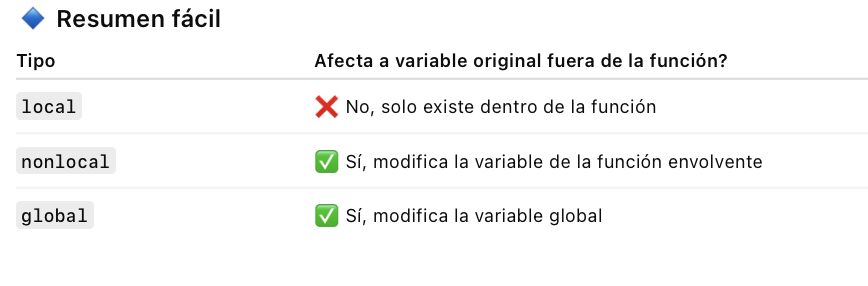

In [18]:
# Suma de números con funciones anidadas

def procesar_lista(lista):
    def sumar_par(lista):
        lista_par = [num for num in lista if num%2 == 0]
        return sum(lista_par)
    def sumar_impar(lista):
        lista_impar = [num for num in lista if num%2 != 0]
        return sum(lista_impar)
    return sumar_par(lista), sumar_impar(lista)

pares, impares = procesar_lista([1,2,3,4])

print("Suma de pares:", pares)
print("Suma de impares:", impares)

Suma de pares: 6
Suma de impares: 4


---
## 4️⃣ Ejercicio 2 — Uso de `nonlocal`

Modifica el ejemplo anterior para que la función interna **modifique el valor** de la variable `x` definida en la función externa (sin usar `global`).

💡 *Pista:* usa la palabra clave `nonlocal` dentro de la función interna.

In [19]:
# Función original:

x = 'global'

def externa():
    x = 'enclosing'
    def interna():
        x = 'local'
        print('Valor dentro de interna:', x)
    interna()
    print('Valor dentro de externa:', x)

externa()
print('Valor global:', x)

Valor dentro de interna: local
Valor dentro de externa: enclosing
Valor global: global


In [22]:
# Escribe tu código aquí...

x = 'global'

def externa():
    x = 'enclosing' # esta x adquiere el valor definido en def interna() por el uso de nonlocal
    def interna():
        nonlocal x
        x = 'local'
        print('Valor dentro de interna:', x)
    interna()
    print('Valor dentro de externa:', x)

externa()
print('Valor global:', x)

Valor dentro de interna: local
Valor dentro de externa: local
Valor global: global


### ✅ Solución propuesta

In [23]:
x = 'global'

def externa():
    x = 'enclosing'
    def interna():
        nonlocal x
        x = 'modificado'
        print('Dentro de interna:', x)
    interna()
    print('Después de interna:', x)

externa()
print('global', x)

Dentro de interna: modificado
Después de interna: modificado
global global


✅ `nonlocal` permite modificar variables definidas en un **ámbito superior no global**, típico en funciones anidadas.

In [24]:
def crearContador(rango):
    contador = 0
    callbacks = []

    def get():
        return contador
    def incrementar():
        nonlocal contador 
        for callback in callbacks:
                callback(contador)
        contador = contador + rango 
    def suscribe(funcion):
        nonlocal callbacks
        callbacks.append(funcion)


    return get,incrementar,suscribe


get, incrementar, suscribe = crearContador(10)
# get, incrementar = crearContador(50)



suscribe(lambda x: print('enviar correo', x))

suscribe(lambda x: print('enviar mensaje', x))



incrementar()
incrementar()
print(get())

incrementar()

incrementar()


incrementar()

enviar correo 0
enviar mensaje 0
enviar correo 10
enviar mensaje 10
20
enviar correo 20
enviar mensaje 20
enviar correo 30
enviar mensaje 30
enviar correo 40
enviar mensaje 40


---
## 5️⃣ Ejercicio 3 — Registro de argumentos

Crea una función decoradora `registrar_llamada(func)` que:
- Reciba una función como parámetro.
- Imprima los valores de `*args` y `**kwargs` cada vez que se llama.
- Devuelva el resultado original de la función.

💡 *Pista:* define una función interna que capture los parámetros de llamada y use `*args`, `**kwargs`.

In [ ]:
# 💡 Pista: define una función interna y retorna su ejecución.

### ✅ Solución propuesta

In [25]:
def registrar_llamada(func):
    def envoltura(*args, **kwargs):
        print(f'📞 Llamando a {func.__name__} con args={args}, kwargs={kwargs}')
        return func(*args, **kwargs)
    return envoltura

@registrar_llamada
def saludar(nombre, saludo='Hola'):
    print(f'{saludo}, {nombre}!')

saludar('Ana')
saludar('Luis', saludo='Buenos días')

📞 Llamando a saludar con args=('Ana',), kwargs={}
Hola, Ana!
📞 Llamando a saludar con args=('Luis',), kwargs={'saludo': 'Buenos días'}
Buenos días, Luis!


✅ Este patrón es la base para los **decoradores**, que veremos en detalle en el notebook 3.3.

---
## 🧠 Resumen del notebook

- `*args` y `**kwargs` permiten manejar argumentos variables.
- El modelo **LEGB** define el orden de búsqueda de variables.
- `nonlocal` sirve para modificar valores en ámbitos intermedios.
- Las funciones anidadas permiten crear comportamientos envolventes.

💡 Próximo paso → **3.3 – Closures y Decoradores: reutilización y envoltura funcional.**